In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def remove_sublist(lst, sublist):
    n = len(sublist)
    for i in range(len(lst) - n + 1):
        if lst[i:i+n] == sublist:
            del lst[i:i+n]
            break
    return lst

In [2]:
benchs_names_list = [['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K'],
                     ['IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO'],
                     ['MMLU','ARC','HellaSwag','Winogrande','TruthfulQA','GSM8K','IFEval','BBH','MATH Lvl 5','GPQA','MUSR','MMLU-PRO']] 
methods_names = ['logF_sigmoid', 'logF_trainlink', 'logF_sigmoid_faminter', 'logF_trainlink_faminter',
                 'logSlogT_sigmoid', 'logSlogT_trainlink', 'logSlogT_sigmoid_faminter', 'logSlogT_trainlink_faminter',
                 'pca_d=1', 'pca_d=2', 'pca_d=3', 'pca_d=4',
                  'factor_sigmoid_d=1','factor_sigmoid_d=2','factor_sigmoid_d=3','factor_sigmoid_d=4',
                  'factor_trainlink_d=1','factor_trainlink_d=2','factor_trainlink_d=3','factor_trainlink_d=4',
                  'factor_sigmoid_faminter_d=1','factor_sigmoid_faminter_d=2','factor_sigmoid_faminter_d=3','factor_sigmoid_faminter_d=4',
                  'factor_trainlink_faminter_d=1','factor_trainlink_faminter_d=2','factor_trainlink_faminter_d=3','factor_trainlink_faminter_d=4']
len(methods_names)

28

In [3]:
colormap = "coolwarm" 

vmin=100*0
vmax=100*.15
inter = 100*np.array([.04,.12])

complete_plot = True

False False


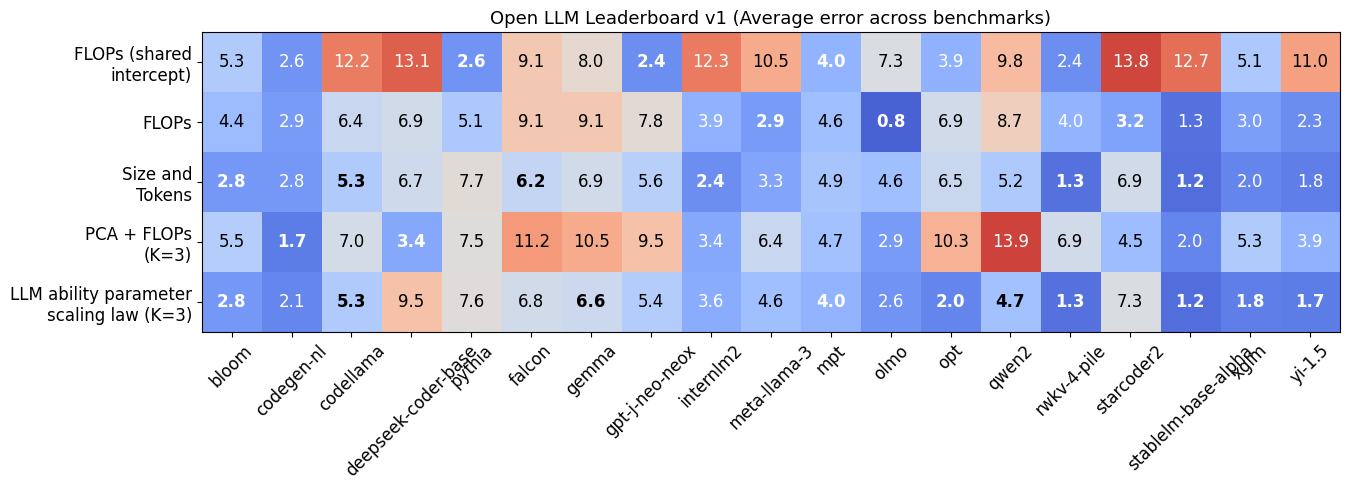

False False


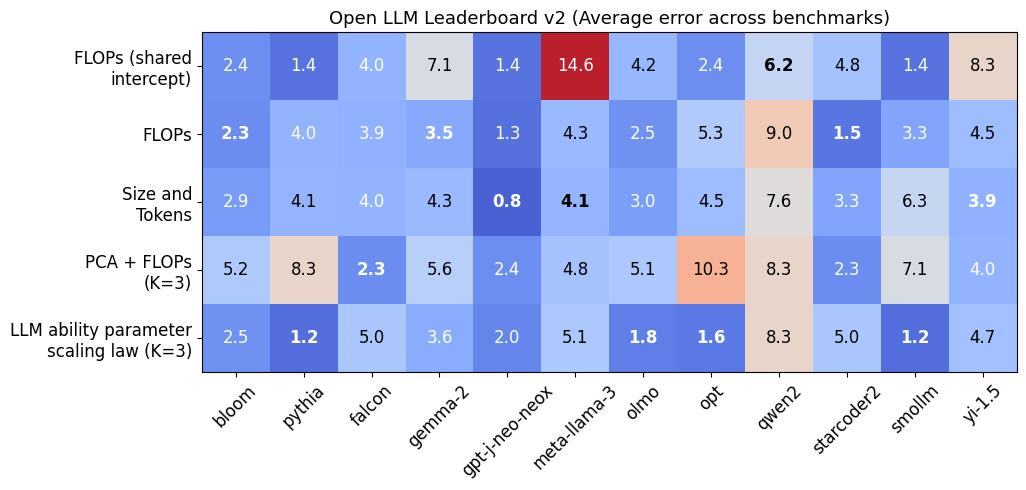

False False


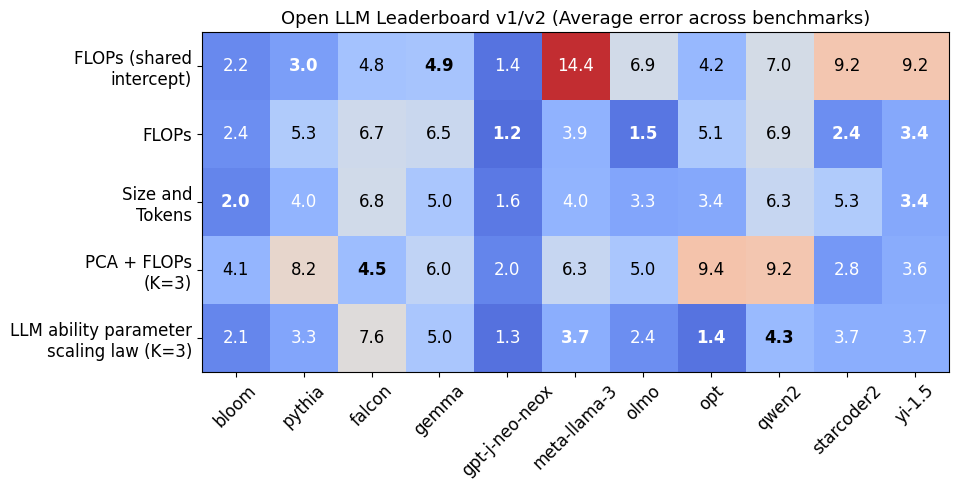

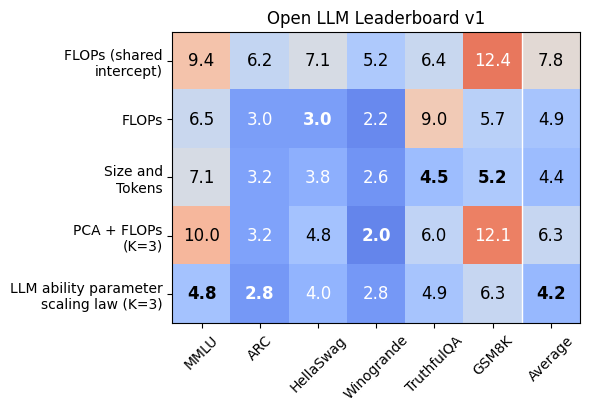

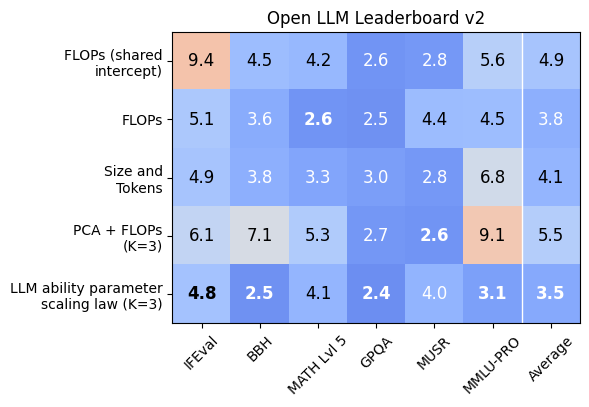

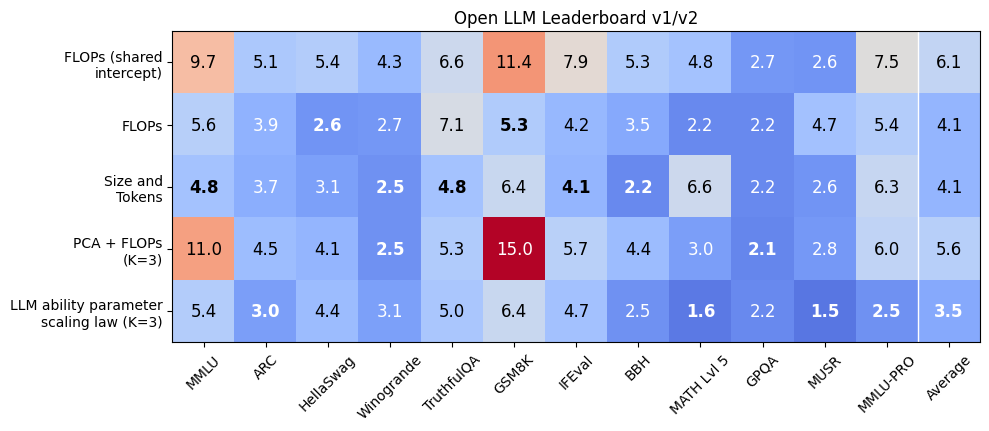

/tmp/ipykernel_2946286/1188084430.py:177: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


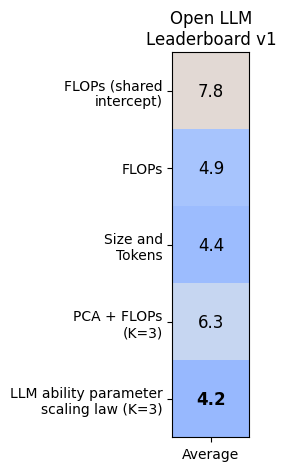

/tmp/ipykernel_2946286/1188084430.py:177: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


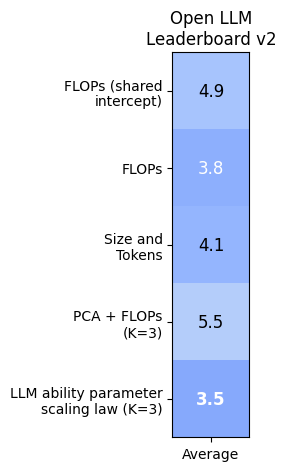

/tmp/ipykernel_2946286/1188084430.py:177: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent overlap


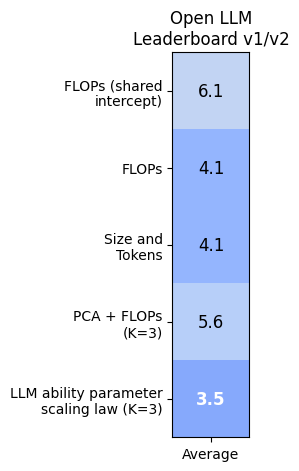

In [8]:
titles = ['Open LLM Leaderboard v1', 'Open LLM Leaderboard v2', 'Open LLM Leaderboard v1/v2']
titles2 = ['Open LLM\nLeaderboard v1', 'Open LLM\nLeaderboard v2', 'Open LLM\nLeaderboard v1/v2']

for complete_plot in [False]: #
    for min_models in [2]:#
    
        t = min_models-1

        select = ['logF_sigmoid',
                  'logF_sigmoid_faminter',
                  'logSlogT_trainlink_faminter',
                  'pca_d=3',
                  'factor_trainlink_faminter_d=3']
     
        names = ['FLOPs (shared\nintercept)',
                 'FLOPs',
                 'Size and\nTokens',
                 'PCA + FLOPs\n(K=3)',
                 'LLM ability parameter\nscaling law (K=3)']

        if complete_plot:
            if t==1:
                pass
            else:
                select = select[1:]
                names = names[1:]
        else:
            if t==1:
                pass
            else:
                select = select[1:]
                names = names[1:]
            
        select_ind = [np.argmax(np.array(methods_names) == m) for m in select]#[m in select for m in methods_names] 
        
        if t==1:
            gold_families_list = [[['meta-llama-3', 'meta-llama-3-instruct'],
                                   ['qwen2'],
                                   ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                                  [['gemma-2', 'gemma-2-it'],
                                   ['meta-llama-3', 'meta-llama-3-instruct','llama-3-sauerkrautlm-instruct'],
                                   ['qwen2','qwen2-instruct','dolphin-2.9.2-qwen2'],
                                   ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']],
                                  [['meta-llama-3', 'meta-llama-3-instruct'],
                                   ['qwen2'],
                                   ['yi-1.5', 'yi-1.5-chat','dolphin-2.9.1-yi-1.5']]]
        else:
            gold_families_list = [[['llama-2', 'llama-2-chat'],
                                  ['qwen2'],
                                  ['yi-1.5', 'yi-1.5-chat']],
                                  [['llama-2', 'llama-2-chat'],
                                   ['qwen2','qwen2-instruct'],
                                   ['yi-1.5', 'yi-1.5-chat']],
                                  [['llama-2', 'llama-2-chat'],
                                   ['qwen2'],
                                   ['yi-1.5','yi-1.5-chat']]]
        
        for gold in [False]:#,True]:#
            for select_models in [False]:#,True]:#
                
                for rr in range(3):
                    print(gold,select_models)
                    results = np.load(f'results/errors_exp-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
                    test_families_list = [e[-1] for e in results]
                    results = np.array([e[0].mean(1) for e in results])
                    M = results.mean(-1).T
                    M = np.round(100*M[select_ind],1)
                
                    fig, ax = plt.subplots(1, 1, figsize=((19/19)*M.shape[1], (12/12)*M.shape[0]))  # Create a figure with a single subplot
                    
                    im = ax.imshow(M, cmap=colormap, vmin=vmin, vmax=vmax)
                    ax.set_xticks(np.arange(M.shape[1]))
                    ax.set_xticklabels([r[0] for r in test_families_list], rotation=45, size=12)
                    ax.set_yticks(np.arange(M.shape[0]))
                    ax.set_yticklabels(names, size=12)
                    ax.set_title(titles[rr] + " (Average error across benchmarks)", size=13)
                    
                    # Loop over data dimensions and create text annotations.
                    for i in range(len(M)):
                        for j in range(len(M.T)):
                            value = M[i, j]
                            color = "black" if value > inter[0] and  value < inter[1] else "white"  # Conditional color
                            
                            # Check if the current value is the lowest in the column
                            if value == np.min(M[:, j]):
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color, weight='bold')
                            else:
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color)
                    
                    plt.tight_layout()  # Adjust layout to prevent overlap
                    
                    plt.savefig(f'plots/pred_errors_models_{rr}_{t}_select-models-{select_models}_complete-plot_{complete_plot}.pdf', bbox_inches='tight', dpi=400, transparent=False)
                    plt.show()
    
                ######################
                for rr in range(3):
                    results = np.load(f'results/errors_exp-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
                    results_gold = np.array([e[0].mean(1) for e in results if e[-1] in gold_families_list[rr]])
                    results = np.array([e[0].mean(1) for e in results])
                
                    if rr<2:
                        fig, ax = plt.subplots(1, 1, figsize=(6, (12/12)*M.shape[0]))  # Create a figure with a single subplot
                    else:
                        fig, ax = plt.subplots(1, 1, figsize=(10, (12/12)*M.shape[0]))  # Create a figure with a single subplot


                    # Plot: Average Error
                    if gold: M = np.mean(results_gold, 0).T
                    else:  M = np.mean(results, 0).T
                    M = np.vstack((M, M.mean(0)[None, :])).T
                    M = np.round(100*M[select_ind],1)
                    im = ax.imshow(M, cmap=colormap, vmin=vmin, vmax=vmax)
                    ax.set_xticks(np.arange(len(benchs_names_list[rr]) + 1))
                    ax.set_xticklabels(benchs_names_list[rr] + ['Average'], rotation=45)
                    ax.set_yticks(np.arange(M.shape[0]))
                    ax.set_yticklabels(names)
                    ax.set_title(titles[rr])
                    
                    # Add vertical line to separate the last columns from the rest
                    ax.axvline(len(benchs_names_list[rr]) - .5, color='white', linewidth=1)
                
                
                    # Loop over data dimensions and create text annotations.
                    for i in range(len(M)):
                        for j in range(len(M.T)):
                            value = M[i, j]
                            color = "black" if value > inter[0] and  value < inter[1] else "white"  # Conditional color
                            
                            # Check if the current value is the lowest in the column
                            if value == np.min(M[:, j]):
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color, weight='bold')
                            else:
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color)
                
                    plt.tight_layout()  # Adjust layout to prevent overlap
                
                    plt.savefig(f'plots/pred_errors_{rr}_{t}_select-models-{select_models}_gold-{gold}_complete-plot_{complete_plot}.pdf', bbox_inches='tight', dpi=400, transparent=False)
                    plt.show()
                
                ######################
                for rr in range(3):
                    results = np.load(f'results/errors_exp-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
                    results_gold = np.array([e[0].mean(1) for e in results if e[-1] in gold_families_list[rr]])
                    results = np.array([e[0].mean(1) for e in results])
                
                    fig, ax = plt.subplots(1, 1, figsize=(12/12, (12/12)*M.shape[0]))  # Create a figure with a single subplot
                
                    # Plot: Average Error
                    if gold: M = np.mean(results_gold, 0).T
                    else: M = np.mean(results, 0).T
                    M = np.vstack((M, M.mean(0)[None, :])).T
                    M = np.round(100*M[select_ind],1)
                    
                    M = M[:,-1:]
                    ax.set_xticks(np.arange(1))
                    ax.set_xticklabels(['Average'], rotation=0)
                
                    im = ax.imshow(M, cmap=colormap, vmin=vmin, vmax=vmax)
                    #ax.set_xticks(np.arange(len(benchs_names_list[rr]) + 1))
                    #ax.set_xticklabels(benchs_names_list[rr] + ['Average'], rotation=90)
                    ax.set_yticks(np.arange(M.shape[0]))
                    ax.set_yticklabels(names)
                    ax.set_title(titles2[rr])
                
                    # Loop over data dimensions and create text annotations.
                    for i in range(len(M)):
                        for j in range(len(M.T)):
                            value = M[i, j]
                            color = "black" if value > inter[0] and  value < inter[1] else "white"  # Conditional color
                            
                            # Check if the current value is the lowest in the column
                            if value == np.min(M[:, j]):
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color, weight='bold')
                            else:
                                text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color)
                
                    plt.tight_layout()  # Adjust layout to prevent overlap
                
                    plt.savefig(f'plots/pred_errors_{rr}_{t}_select-models-{select_models}_gold-{gold}_complete-plot_{complete_plot}_avg.pdf', bbox_inches='tight', dpi=400, transparent=False)
                    plt.show()


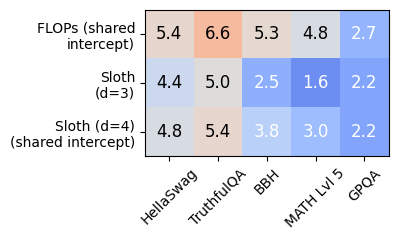

In [9]:
bench_inds = [2,4,7,8,9]
vmin=0
vmax=10
for min_models in [2]:#
    select_models = False
    t = min_models-1

    select = ['logF_sigmoid','factor_trainlink_faminter_d=3','factor_trainlink_d=4']

    names = ['FLOPs (shared\nintercept)','Sloth\n(d=3)','Sloth (d=4)\n(shared intercept)']

                
    ######################
    rr=2
    results = np.load(f'results/errors_exp-{rr}_n-train-models-{t}_select-models-{select_models}.npy', allow_pickle=True).item()['out']
    results = np.array([e[0].mean(1) for e in results])

    fig, ax = plt.subplots(1, 1, figsize=(9, (10/12)*M.shape[0]))  # Create a figure with a single subplot

    # Plot: Average Error
    select_ind = [np.argmax(np.array(methods_names) == m) for m in select] #[m in select for m in methods_names]
    M = np.mean(results, 0)
    M = np.round(100*M[select_ind],1)[:,bench_inds]
    im = ax.imshow(M, cmap=colormap, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(len(bench_inds)))
    ax.set_xticklabels(np.array(benchs_names_list[rr])[bench_inds], rotation=45)
    ax.set_yticks(np.arange(M.shape[0]))
    ax.set_yticklabels(names)
    #ax.set_title(titles[rr])
    
    # Add vertical line to separate the last columns from the rest
    #ax.axvline(len(benchs_names_list[rr]) - .5, color='white', linewidth=1)


    # Loop over data dimensions and create text annotations.
    for i in range(len(M)):
        for j in range(len(M.T)):
            value = M[i, j]
            color = "black" if value > inter[0] and  value < inter[1] else "white"  # Conditional color
            
            # Check if the current value is the lowest in the column
            text = ax.text(j, i, f'{value:.1f}', size=12, ha="center", va="center", color=color)

    plt.tight_layout()  # Adjust layout to prevent overlap

    plt.savefig(f'plots/pred_errors_shared.pdf', bbox_inches='tight', dpi=400, transparent=False)
    plt.show()
          

In [6]:
len(benchs_names_list[rr])-len(bench_inds)

7